# Multimodal search module

This notebooks shows how to carry out an image multimodal search with the [LAVIS](https://github.com/salesforce/LAVIS) library. 

The first cell is only run on google colab and installs the [ammico](https://github.com/ssciwr/AMMICO) package.

After that, we can import `ammico` and read in the files given a folder path.

In [1]:
# if running on google colab
# flake8-noqa-cell
import os

if "google.colab" in str(get_ipython()):
    # update python version
    # install setuptools
    # %pip install setuptools==61 -qqq
    # install ammico
    %pip install git+https://github.com/ssciwr/ammico.git -qqq
    # mount google drive for data and API key
    from google.colab import drive

    drive.mount("/content/drive")

In [2]:
# if there is not enough space on your hard drive, clear the cache folder
# this cell will delete all your cache!
!rm -rf ~/.cache
!mkdir ~/.cache

In [3]:
import ammico.utils as mutils
import ammico.multimodal_search as ms

In [4]:
mydict = mutils.find_files(
    path="data/",
    limit=10,
)

In [5]:
mydict

{'102730_eng': {'filename': 'data/102730_eng.png'},
 '102141_2_eng': {'filename': 'data/102141_2_eng.png'},
 '106349S_por': {'filename': 'data/106349S_por.png'}}

## Indexing and extracting features from images in selected folder

First you need to select a model. You can choose one of the following models: 
- [blip](https://github.com/salesforce/BLIP)
- [blip2](https://huggingface.co/docs/transformers/main/model_doc/blip-2) 
- [albef](https://github.com/salesforce/ALBEF) 
- [clip_base](https://github.com/openai/CLIP/blob/main/model-card.md)
- [clip_vitl14](https://github.com/mlfoundations/open_clip) 
- [clip_vitl14_336](https://github.com/mlfoundations/open_clip)

In [6]:
model_type = "blip"
# model_type = "blip2"
# model_type = "albef"
# model_type = "clip_base"
# model_type = "clip_vitl14"
# model_type = "clip_vitl14_336"

To process the loaded images using the selected model, use the below code:

In [7]:
my_obj = ms.MultimodalSearch(mydict)

In [8]:
my_obj.subdict

{'102730_eng': {'filename': 'data/102730_eng.png'},
 '102141_2_eng': {'filename': 'data/102141_2_eng.png'},
 '106349S_por': {'filename': 'data/106349S_por.png'}}

In [9]:
(
    model,
    vis_processors,
    txt_processors,
    image_keys,
    image_names,
    features_image_stacked,
) = my_obj.parsing_images(
    model_type, 
    path_to_save_tensors="data/",
    )

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 42.2MB/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 16.5kB/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json: 100%|██████████| 570/570 [00:00<00:00, 962kB/s]

  0%|          | 0.00/1.97G [00:00<?, ?B/s]

  0%|          | 4.01M/1.97G [00:00<01:04, 32.7MB/s]

  0%|          | 8.01M/1.97G [00:00<01:01, 34.5MB/s]

  1%|          | 14.1M/1.97G [00:00<00:45, 46.3MB/s]

  1%|          | 18.7M/1.97G [00:00<00:44, 47.2MB/s]

  1%|          | 24.0M/1.97G [00:00<00:41, 50.2MB/s]

  1%|▏         | 29.8M/1.97G [00:00<00:39, 53.3MB/s]

  2%|▏         | 34.9M/1.97G [00:00<00:45, 45.6MB/s]

  2%|▏         | 40.0M/1.97G [00:01<01:02, 33.2MB/s]

  2%|▏         | 47.9M/1.97G [00:01<00:47, 43.9MB/s]

  3%|▎         | 52.9M/1.97G [00:01<01:08, 30.2MB/s]

  3%|▎         | 56.9M/1.97G [00:01<01:07, 30.6MB/s]

  3%|▎         | 64.0M/1.97G [00:02<01:23, 24.5MB/s]

  3%|▎         | 70.4M/1.97G [00:02<01:06, 30.9MB/s]

  4%|▎         | 74.5M/1.97G [00:02<01:05, 31.3MB/s]

  4%|▍         | 80.0M/1.97G [00:02<01:23, 24.2MB/s]

  4%|▍         | 83.3M/1.97G [00:02<01:18, 25.9MB/s]

  4%|▍         | 88.0M/1.97G [00:02<01:21, 24.7MB/s]

  5%|▍         | 93.5M/1.97G [00:03<01:06, 30.4MB/s]

  5%|▍         | 98.6M/1.97G [00:03<00:58, 34.7MB/s]

  5%|▌         | 103M/1.97G [00:03<00:52, 38.1MB/s] 

  6%|▌         | 111M/1.97G [00:03<00:40, 49.1MB/s]

  6%|▌         | 118M/1.97G [00:03<00:37, 52.8MB/s]

  6%|▌         | 123M/1.97G [00:03<00:35, 55.3MB/s]

  6%|▋         | 129M/1.97G [00:03<00:35, 55.1MB/s]

  7%|▋         | 136M/1.97G [00:03<00:33, 58.5MB/s]

  7%|▋         | 142M/1.97G [00:03<00:33, 58.6MB/s]

  7%|▋         | 148M/1.97G [00:03<00:33, 57.7MB/s]

  8%|▊         | 153M/1.97G [00:04<00:35, 55.5MB/s]

  8%|▊         | 160M/1.97G [00:04<00:34, 56.5MB/s]

  8%|▊         | 166M/1.97G [00:04<00:33, 57.8MB/s]

  8%|▊         | 171M/1.97G [00:04<00:33, 57.0MB/s]

  9%|▉         | 177M/1.97G [00:04<00:33, 57.4MB/s]

  9%|▉         | 184M/1.97G [00:04<00:34, 56.5MB/s]

  9%|▉         | 191M/1.97G [00:04<00:30, 62.0MB/s]

 10%|▉         | 197M/1.97G [00:04<00:43, 43.7MB/s]

 10%|█         | 202M/1.97G [00:05<00:43, 44.0MB/s]

 10%|█         | 208M/1.97G [00:05<00:42, 44.1MB/s]

 11%|█         | 213M/1.97G [00:05<00:42, 44.3MB/s]

 11%|█         | 217M/1.97G [00:05<00:43, 43.0MB/s]

 11%|█         | 224M/1.97G [00:05<00:41, 45.0MB/s]

 11%|█▏        | 228M/1.97G [00:05<00:42, 44.7MB/s]

 12%|█▏        | 235M/1.97G [00:05<00:36, 51.5MB/s]

 12%|█▏        | 240M/1.97G [00:05<00:36, 51.3MB/s]

 12%|█▏        | 248M/1.97G [00:06<00:34, 53.8MB/s]

 13%|█▎        | 255M/1.97G [00:06<00:31, 57.9MB/s]

 13%|█▎        | 260M/1.97G [00:06<00:32, 57.3MB/s]

 13%|█▎        | 266M/1.97G [00:06<00:31, 58.3MB/s]

 13%|█▎        | 272M/1.97G [00:06<00:31, 58.7MB/s]

 14%|█▍        | 278M/1.97G [00:06<00:29, 61.2MB/s]

 14%|█▍        | 284M/1.97G [00:06<00:30, 60.4MB/s]

 14%|█▍        | 291M/1.97G [00:06<00:28, 62.7MB/s]

 15%|█▍        | 298M/1.97G [00:06<00:27, 66.6MB/s]

 15%|█▌        | 305M/1.97G [00:06<00:27, 65.4MB/s]

 15%|█▌        | 311M/1.97G [00:07<00:27, 65.3MB/s]

 16%|█▌        | 318M/1.97G [00:07<00:26, 68.0MB/s]

 16%|█▌        | 325M/1.97G [00:07<00:25, 70.2MB/s]

 16%|█▋        | 332M/1.97G [00:07<00:25, 69.7MB/s]

 17%|█▋        | 339M/1.97G [00:07<00:25, 68.0MB/s]

 17%|█▋        | 347M/1.97G [00:07<00:24, 72.8MB/s]

 18%|█▊        | 354M/1.97G [00:07<00:25, 68.8MB/s]

 18%|█▊        | 361M/1.97G [00:07<00:24, 69.7MB/s]

 18%|█▊        | 368M/1.97G [00:07<00:24, 72.0MB/s]

 19%|█▊        | 376M/1.97G [00:08<00:23, 74.3MB/s]

 19%|█▉        | 383M/1.97G [00:08<00:24, 69.9MB/s]

 19%|█▉        | 389M/1.97G [00:08<00:25, 68.1MB/s]

 20%|█▉        | 397M/1.97G [00:08<00:23, 71.1MB/s]

 20%|██        | 404M/1.97G [00:08<00:24, 68.7MB/s]

 20%|██        | 410M/1.97G [00:08<00:24, 68.0MB/s]

 21%|██        | 417M/1.97G [00:08<00:35, 47.5MB/s]

 21%|██        | 424M/1.97G [00:09<00:45, 36.6MB/s]

 21%|██▏       | 429M/1.97G [00:09<00:41, 40.2MB/s]

 22%|██▏       | 434M/1.97G [00:09<00:42, 38.8MB/s]

 22%|██▏       | 440M/1.97G [00:09<00:48, 33.8MB/s]

 22%|██▏       | 444M/1.97G [00:09<00:45, 36.3MB/s]

 22%|██▏       | 451M/1.97G [00:09<00:38, 43.2MB/s]

 23%|██▎       | 457M/1.97G [00:09<00:34, 47.5MB/s]

 23%|██▎       | 462M/1.97G [00:10<00:32, 49.9MB/s]

 23%|██▎       | 469M/1.97G [00:10<00:29, 55.1MB/s]

 24%|██▎       | 475M/1.97G [00:10<00:29, 55.4MB/s]

 24%|██▍       | 480M/1.97G [00:10<00:29, 55.3MB/s]

 24%|██▍       | 488M/1.97G [00:10<00:26, 61.2MB/s]

 24%|██▍       | 494M/1.97G [00:10<00:26, 59.8MB/s]

 25%|██▍       | 499M/1.97G [00:10<00:29, 53.6MB/s]

 25%|██▌       | 506M/1.97G [00:10<00:27, 57.8MB/s]

 25%|██▌       | 513M/1.97G [00:10<00:25, 60.8MB/s]

 26%|██▌       | 520M/1.97G [00:10<00:24, 65.2MB/s]

 26%|██▌       | 528M/1.97G [00:11<00:22, 70.3MB/s]

 27%|██▋       | 535M/1.97G [00:11<00:24, 64.0MB/s]

 27%|██▋       | 541M/1.97G [00:11<00:24, 63.8MB/s]

 27%|██▋       | 548M/1.97G [00:11<00:23, 66.4MB/s]

 28%|██▊       | 556M/1.97G [00:11<00:21, 70.2MB/s]

 28%|██▊       | 562M/1.97G [00:11<00:23, 65.6MB/s]

 28%|██▊       | 570M/1.97G [00:11<00:22, 68.6MB/s]

 29%|██▊       | 577M/1.97G [00:11<00:30, 50.3MB/s]

 29%|██▉       | 584M/1.97G [00:12<00:29, 51.7MB/s]

 29%|██▉       | 591M/1.97G [00:12<00:26, 57.2MB/s]

 30%|██▉       | 597M/1.97G [00:12<00:28, 52.8MB/s]

 30%|██▉       | 603M/1.97G [00:12<00:34, 42.4MB/s]

 30%|███       | 609M/1.97G [00:12<00:31, 46.5MB/s]

 31%|███       | 616M/1.97G [00:12<00:27, 54.0MB/s]

 31%|███       | 623M/1.97G [00:12<00:24, 58.5MB/s]

 31%|███       | 629M/1.97G [00:12<00:23, 61.1MB/s]

 32%|███▏      | 637M/1.97G [00:13<00:21, 66.9MB/s]

 32%|███▏      | 644M/1.97G [00:13<00:24, 57.7MB/s]

 32%|███▏      | 651M/1.97G [00:13<00:23, 61.9MB/s]

 33%|███▎      | 657M/1.97G [00:13<00:29, 48.6MB/s]

 33%|███▎      | 663M/1.97G [00:13<00:27, 51.2MB/s]

 33%|███▎      | 669M/1.97G [00:13<00:27, 51.7MB/s]

 33%|███▎      | 674M/1.97G [00:13<00:26, 53.4MB/s]

 34%|███▍      | 682M/1.97G [00:13<00:23, 59.7MB/s]

 34%|███▍      | 688M/1.97G [00:14<00:23, 59.5MB/s]

 34%|███▍      | 694M/1.97G [00:14<00:22, 60.4MB/s]

 35%|███▍      | 701M/1.97G [00:14<00:21, 63.0MB/s]

 35%|███▌      | 707M/1.97G [00:14<00:24, 55.1MB/s]

 35%|███▌      | 712M/1.97G [00:14<00:43, 31.4MB/s]

 36%|███▌      | 720M/1.97G [00:14<00:34, 39.4MB/s]

 36%|███▌      | 725M/1.97G [00:15<00:35, 38.1MB/s]

 36%|███▋      | 732M/1.97G [00:15<00:30, 44.8MB/s]

 37%|███▋      | 737M/1.97G [00:15<00:29, 45.0MB/s]

 37%|███▋      | 744M/1.97G [00:15<00:26, 49.6MB/s]

 37%|███▋      | 749M/1.97G [00:15<00:26, 51.1MB/s]

 37%|███▋      | 755M/1.97G [00:15<00:25, 52.9MB/s]

 38%|███▊      | 760M/1.97G [00:15<00:25, 52.4MB/s]

 38%|███▊      | 768M/1.97G [00:15<00:22, 59.5MB/s]

 38%|███▊      | 774M/1.97G [00:15<00:21, 60.0MB/s]

 39%|███▊      | 780M/1.97G [00:16<00:21, 59.9MB/s]

 39%|███▉      | 786M/1.97G [00:16<00:21, 60.5MB/s]

 39%|███▉      | 792M/1.97G [00:16<00:21, 60.6MB/s]

 40%|███▉      | 798M/1.97G [00:16<00:22, 57.3MB/s]

 40%|███▉      | 803M/1.97G [00:16<00:24, 51.3MB/s]

 40%|████      | 808M/1.97G [00:16<00:26, 48.4MB/s]

 40%|████      | 814M/1.97G [00:16<00:24, 50.8MB/s]

 41%|████      | 819M/1.97G [00:16<00:25, 49.4MB/s]

 41%|████      | 824M/1.97G [00:17<00:31, 39.5MB/s]

 41%|████      | 828M/1.97G [00:17<00:30, 40.7MB/s]

 41%|████▏     | 834M/1.97G [00:17<00:27, 45.6MB/s]

 42%|████▏     | 840M/1.97G [00:17<00:29, 41.4MB/s]

 42%|████▏     | 847M/1.97G [00:17<00:24, 49.5MB/s]

 42%|████▏     | 852M/1.97G [00:17<00:24, 49.9MB/s]

 42%|████▏     | 857M/1.97G [00:17<00:26, 45.6MB/s]

 43%|████▎     | 864M/1.97G [00:17<00:24, 49.6MB/s]

 43%|████▎     | 872M/1.97G [00:18<00:20, 57.5MB/s]

 43%|████▎     | 877M/1.97G [00:18<00:20, 57.9MB/s]

 44%|████▍     | 885M/1.97G [00:18<00:18, 64.3MB/s]

 44%|████▍     | 893M/1.97G [00:18<00:16, 70.2MB/s]

 45%|████▍     | 900M/1.97G [00:18<00:25, 46.3MB/s]

 45%|████▍     | 906M/1.97G [00:18<00:29, 39.3MB/s]

 45%|████▌     | 912M/1.97G [00:18<00:27, 41.6MB/s]

 45%|████▌     | 918M/1.97G [00:19<00:25, 45.1MB/s]

 46%|████▌     | 925M/1.97G [00:19<00:21, 52.3MB/s]

 46%|████▌     | 931M/1.97G [00:19<00:21, 54.2MB/s]

 46%|████▋     | 936M/1.97G [00:19<00:21, 53.9MB/s]

 47%|████▋     | 944M/1.97G [00:19<00:18, 59.6MB/s]

 47%|████▋     | 950M/1.97G [00:19<00:23, 47.4MB/s]

 47%|████▋     | 955M/1.97G [00:19<00:27, 40.9MB/s]

 48%|████▊     | 960M/1.97G [00:19<00:24, 44.9MB/s]

 48%|████▊     | 968M/1.97G [00:20<00:20, 53.3MB/s]

 48%|████▊     | 974M/1.97G [00:20<00:20, 54.6MB/s]

 49%|████▊     | 979M/1.97G [00:20<00:19, 55.8MB/s]

 49%|████▉     | 987M/1.97G [00:20<00:17, 62.8MB/s]

 49%|████▉     | 995M/1.97G [00:20<00:15, 67.4MB/s]

 50%|████▉     | 0.98G/1.97G [00:20<00:15, 70.7MB/s]

 50%|█████     | 0.99G/1.97G [00:20<00:14, 73.0MB/s]

 50%|█████     | 0.99G/1.97G [00:20<00:14, 70.1MB/s]

 51%|█████     | 1.00G/1.97G [00:20<00:19, 54.2MB/s]

 51%|█████     | 1.01G/1.97G [00:21<00:21, 49.3MB/s]

 51%|█████▏    | 1.01G/1.97G [00:21<00:18, 54.5MB/s]

 52%|█████▏    | 1.02G/1.97G [00:21<00:18, 56.5MB/s]

 52%|█████▏    | 1.02G/1.97G [00:21<00:17, 57.2MB/s]

 52%|█████▏    | 1.03G/1.97G [00:21<00:17, 58.9MB/s]

 53%|█████▎    | 1.04G/1.97G [00:21<00:17, 56.3MB/s]

 53%|█████▎    | 1.04G/1.97G [00:21<00:17, 56.1MB/s]

 53%|█████▎    | 1.05G/1.97G [00:21<00:20, 49.3MB/s]

 53%|█████▎    | 1.05G/1.97G [00:22<00:18, 53.8MB/s]

 54%|█████▎    | 1.06G/1.97G [00:22<00:23, 42.0MB/s]

 54%|█████▍    | 1.06G/1.97G [00:22<00:24, 39.4MB/s]

 54%|█████▍    | 1.07G/1.97G [00:22<00:23, 41.2MB/s]

 54%|█████▍    | 1.07G/1.97G [00:22<00:21, 44.3MB/s]

 55%|█████▍    | 1.08G/1.97G [00:22<00:21, 44.6MB/s]

 55%|█████▌    | 1.09G/1.97G [00:22<00:18, 52.6MB/s]

 55%|█████▌    | 1.09G/1.97G [00:22<00:19, 48.3MB/s]

 56%|█████▌    | 1.10G/1.97G [00:23<00:19, 47.4MB/s]

 56%|█████▌    | 1.10G/1.97G [00:23<00:17, 52.3MB/s]

 56%|█████▋    | 1.11G/1.97G [00:23<00:15, 58.9MB/s]

 57%|█████▋    | 1.11G/1.97G [00:23<00:15, 60.2MB/s]

 57%|█████▋    | 1.12G/1.97G [00:23<00:14, 64.9MB/s]

 57%|█████▋    | 1.13G/1.97G [00:23<00:15, 57.6MB/s]

 58%|█████▊    | 1.14G/1.97G [00:23<00:14, 63.8MB/s]

 58%|█████▊    | 1.14G/1.97G [00:23<00:14, 61.7MB/s]

 58%|█████▊    | 1.15G/1.97G [00:23<00:14, 62.2MB/s]

 59%|█████▊    | 1.16G/1.97G [00:24<00:13, 64.7MB/s]

 59%|█████▉    | 1.16G/1.97G [00:24<00:15, 54.7MB/s]

 59%|█████▉    | 1.17G/1.97G [00:24<00:16, 51.2MB/s]

 59%|█████▉    | 1.17G/1.97G [00:24<00:18, 45.6MB/s]

 60%|█████▉    | 1.18G/1.97G [00:24<00:15, 53.2MB/s]

 60%|██████    | 1.18G/1.97G [00:24<00:18, 44.9MB/s]

 60%|██████    | 1.19G/1.97G [00:24<00:15, 53.1MB/s]

 61%|██████    | 1.20G/1.97G [00:24<00:14, 56.3MB/s]

 61%|██████    | 1.21G/1.97G [00:25<00:13, 61.7MB/s]

 62%|██████▏   | 1.21G/1.97G [00:25<00:12, 64.8MB/s]

 62%|██████▏   | 1.22G/1.97G [00:25<00:16, 48.1MB/s]

 62%|██████▏   | 1.23G/1.97G [00:25<00:14, 54.5MB/s]

 63%|██████▎   | 1.23G/1.97G [00:26<00:31, 25.4MB/s]

 63%|██████▎   | 1.24G/1.97G [00:26<00:37, 21.1MB/s]

 63%|██████▎   | 1.24G/1.97G [00:26<00:29, 26.2MB/s]

 63%|██████▎   | 1.25G/1.97G [00:26<00:33, 23.1MB/s]

 64%|██████▎   | 1.25G/1.97G [00:26<00:27, 28.5MB/s]

 64%|██████▍   | 1.26G/1.97G [00:27<00:23, 32.6MB/s]

 64%|██████▍   | 1.26G/1.97G [00:27<00:19, 39.3MB/s]

 64%|██████▍   | 1.27G/1.97G [00:27<00:17, 43.6MB/s]

 65%|██████▍   | 1.27G/1.97G [00:27<00:16, 44.7MB/s]

 65%|██████▍   | 1.28G/1.97G [00:27<00:14, 49.5MB/s]

 65%|██████▌   | 1.28G/1.97G [00:27<00:17, 41.2MB/s]

 65%|██████▌   | 1.29G/1.97G [00:27<00:17, 41.5MB/s]

 66%|██████▌   | 1.29G/1.97G [00:27<00:15, 45.7MB/s]

 66%|██████▌   | 1.30G/1.97G [00:28<00:17, 40.7MB/s]

 66%|██████▌   | 1.30G/1.97G [00:28<00:16, 43.8MB/s]

 66%|██████▋   | 1.31G/1.97G [00:28<00:16, 41.9MB/s]

 67%|██████▋   | 1.32G/1.97G [00:28<00:14, 48.3MB/s]

 67%|██████▋   | 1.32G/1.97G [00:28<00:13, 50.0MB/s]

 67%|██████▋   | 1.33G/1.97G [00:28<00:13, 51.2MB/s]

 68%|██████▊   | 1.33G/1.97G [00:28<00:12, 54.1MB/s]

 68%|██████▊   | 1.34G/1.97G [00:28<00:13, 52.3MB/s]

 68%|██████▊   | 1.34G/1.97G [00:28<00:12, 52.4MB/s]

 68%|██████▊   | 1.35G/1.97G [00:28<00:11, 60.4MB/s]

 69%|██████▊   | 1.35G/1.97G [00:29<00:13, 47.8MB/s]

 69%|██████▉   | 1.36G/1.97G [00:29<00:13, 49.5MB/s]

 69%|██████▉   | 1.37G/1.97G [00:29<00:13, 49.4MB/s]

 70%|██████▉   | 1.37G/1.97G [00:29<00:11, 56.4MB/s]

 70%|███████   | 1.38G/1.97G [00:29<00:11, 53.6MB/s]

 70%|███████   | 1.39G/1.97G [00:29<00:11, 55.5MB/s]

 71%|███████   | 1.39G/1.97G [00:29<00:10, 57.9MB/s]

 71%|███████   | 1.40G/1.97G [00:29<00:10, 58.5MB/s]

 71%|███████▏  | 1.41G/1.97G [00:30<00:09, 66.5MB/s]

 72%|███████▏  | 1.41G/1.97G [00:30<00:10, 59.2MB/s]

 72%|███████▏  | 1.42G/1.97G [00:30<00:10, 57.6MB/s]

 72%|███████▏  | 1.42G/1.97G [00:30<00:13, 45.1MB/s]

 73%|███████▎  | 1.43G/1.97G [00:30<00:09, 63.1MB/s]

 73%|███████▎  | 1.44G/1.97G [00:30<00:11, 48.9MB/s]

 73%|███████▎  | 1.45G/1.97G [00:31<00:11, 49.5MB/s]

 74%|███████▎  | 1.45G/1.97G [00:31<00:10, 52.1MB/s]

 74%|███████▍  | 1.46G/1.97G [00:31<00:10, 53.4MB/s]

 74%|███████▍  | 1.47G/1.97G [00:31<00:09, 58.6MB/s]

 75%|███████▍  | 1.47G/1.97G [00:31<00:09, 59.5MB/s]

 75%|███████▍  | 1.48G/1.97G [00:31<00:08, 59.1MB/s]

 75%|███████▌  | 1.48G/1.97G [00:31<00:08, 60.3MB/s]

 76%|███████▌  | 1.49G/1.97G [00:31<00:08, 63.8MB/s]

 76%|███████▌  | 1.50G/1.97G [00:31<00:08, 62.1MB/s]

 76%|███████▌  | 1.50G/1.97G [00:31<00:08, 62.0MB/s]

 77%|███████▋  | 1.51G/1.97G [00:32<00:08, 61.1MB/s]

 77%|███████▋  | 1.51G/1.97G [00:32<00:08, 60.6MB/s]

 77%|███████▋  | 1.52G/1.97G [00:32<00:08, 56.9MB/s]

 77%|███████▋  | 1.52G/1.97G [00:32<00:08, 54.9MB/s]

 78%|███████▊  | 1.53G/1.97G [00:32<00:08, 58.7MB/s]

 78%|███████▊  | 1.54G/1.97G [00:32<00:07, 64.1MB/s]

 78%|███████▊  | 1.54G/1.97G [00:32<00:07, 62.5MB/s]

 79%|███████▊  | 1.55G/1.97G [00:32<00:07, 63.5MB/s]

 79%|███████▉  | 1.56G/1.97G [00:32<00:06, 67.0MB/s]

 79%|███████▉  | 1.57G/1.97G [00:32<00:06, 70.9MB/s]

 80%|███████▉  | 1.57G/1.97G [00:33<00:05, 73.0MB/s]

 80%|████████  | 1.58G/1.97G [00:33<00:07, 58.9MB/s]

 80%|████████  | 1.59G/1.97G [00:33<00:07, 52.9MB/s]

 81%|████████  | 1.59G/1.97G [00:33<00:07, 54.9MB/s]

 81%|████████  | 1.60G/1.97G [00:33<00:06, 60.4MB/s]

 81%|████████▏ | 1.60G/1.97G [00:33<00:06, 60.8MB/s]

 82%|████████▏ | 1.61G/1.97G [00:33<00:06, 57.9MB/s]

 82%|████████▏ | 1.62G/1.97G [00:33<00:06, 60.0MB/s]

 82%|████████▏ | 1.62G/1.97G [00:34<00:06, 60.5MB/s]

 83%|████████▎ | 1.63G/1.97G [00:34<00:07, 52.2MB/s]

 83%|████████▎ | 1.63G/1.97G [00:34<00:07, 49.4MB/s]

 83%|████████▎ | 1.64G/1.97G [00:34<00:06, 50.8MB/s]

 84%|████████▎ | 1.65G/1.97G [00:34<00:06, 54.3MB/s]

 84%|████████▍ | 1.65G/1.97G [00:34<00:07, 47.6MB/s]

 84%|████████▍ | 1.66G/1.97G [00:34<00:06, 53.6MB/s]

 84%|████████▍ | 1.66G/1.97G [00:35<00:06, 48.4MB/s]

 85%|████████▍ | 1.67G/1.97G [00:35<00:06, 53.6MB/s]

 85%|████████▌ | 1.68G/1.97G [00:35<00:05, 58.2MB/s]

 85%|████████▌ | 1.68G/1.97G [00:35<00:06, 44.8MB/s]

 86%|████████▌ | 1.69G/1.97G [00:35<00:05, 52.0MB/s]

 86%|████████▌ | 1.70G/1.97G [00:35<00:05, 55.0MB/s]

 86%|████████▋ | 1.70G/1.97G [00:35<00:04, 60.2MB/s]

 87%|████████▋ | 1.71G/1.97G [00:35<00:04, 66.1MB/s]

 87%|████████▋ | 1.72G/1.97G [00:35<00:03, 68.5MB/s]

 88%|████████▊ | 1.72G/1.97G [00:36<00:04, 53.1MB/s]

 88%|████████▊ | 1.73G/1.97G [00:36<00:05, 43.8MB/s]

 88%|████████▊ | 1.73G/1.97G [00:36<00:05, 44.5MB/s]

 88%|████████▊ | 1.74G/1.97G [00:36<00:06, 35.0MB/s]

 89%|████████▉ | 1.75G/1.97G [00:36<00:05, 42.8MB/s]

 89%|████████▉ | 1.75G/1.97G [00:36<00:05, 43.0MB/s]

 89%|████████▉ | 1.76G/1.97G [00:37<00:05, 44.8MB/s]

 90%|████████▉ | 1.77G/1.97G [00:37<00:04, 49.3MB/s]

 90%|████████▉ | 1.77G/1.97G [00:37<00:03, 57.1MB/s]

 90%|█████████ | 1.78G/1.97G [00:37<00:03, 54.0MB/s]

 91%|█████████ | 1.78G/1.97G [00:37<00:04, 48.7MB/s]

 91%|█████████ | 1.79G/1.97G [00:37<00:04, 39.7MB/s]

 91%|█████████ | 1.80G/1.97G [00:37<00:04, 45.0MB/s]

 91%|█████████▏| 1.80G/1.97G [00:37<00:03, 54.0MB/s]

 92%|█████████▏| 1.81G/1.97G [00:38<00:03, 54.2MB/s]

 92%|█████████▏| 1.81G/1.97G [00:38<00:03, 48.5MB/s]

 92%|█████████▏| 1.82G/1.97G [00:38<00:03, 53.4MB/s]

 93%|█████████▎| 1.83G/1.97G [00:38<00:02, 56.7MB/s]

 93%|█████████▎| 1.83G/1.97G [00:38<00:02, 57.8MB/s]

 93%|█████████▎| 1.84G/1.97G [00:38<00:02, 53.0MB/s]

 94%|█████████▎| 1.84G/1.97G [00:38<00:02, 57.1MB/s]

 94%|█████████▍| 1.85G/1.97G [00:38<00:02, 63.1MB/s]

 94%|█████████▍| 1.86G/1.97G [00:38<00:01, 69.9MB/s]

 95%|█████████▍| 1.87G/1.97G [00:39<00:01, 70.9MB/s]

 95%|█████████▌| 1.87G/1.97G [00:39<00:01, 72.3MB/s]

 95%|█████████▌| 1.88G/1.97G [00:39<00:01, 69.0MB/s]

 96%|█████████▌| 1.89G/1.97G [00:39<00:01, 71.8MB/s]

 96%|█████████▌| 1.89G/1.97G [00:39<00:01, 71.5MB/s]

 96%|█████████▋| 1.90G/1.97G [00:39<00:01, 52.7MB/s]

 97%|█████████▋| 1.91G/1.97G [00:39<00:01, 52.2MB/s]

 97%|█████████▋| 1.91G/1.97G [00:39<00:01, 57.7MB/s]

 98%|█████████▊| 1.92G/1.97G [00:40<00:00, 59.7MB/s]

 98%|█████████▊| 1.93G/1.97G [00:40<00:00, 65.6MB/s]

 98%|█████████▊| 1.94G/1.97G [00:40<00:00, 62.0MB/s]

 99%|█████████▊| 1.94G/1.97G [00:40<00:00, 32.2MB/s]

 99%|█████████▉| 1.95G/1.97G [00:41<00:00, 28.7MB/s]

 99%|█████████▉| 1.95G/1.97G [00:41<00:00, 32.3MB/s]

 99%|█████████▉| 1.96G/1.97G [00:41<00:00, 39.9MB/s]

100%|█████████▉| 1.97G/1.97G [00:41<00:00, 30.3MB/s]

100%|██████████| 1.97G/1.97G [00:41<00:00, 50.8MB/s]

In [10]:
features_image_stacked

tensor([[ 1.1012e-01, -7.5168e-02,  5.1168e-02, -1.7778e-01, -1.6888e-01,
         -9.1133e-04,  1.3566e-02, -1.4314e-01,  6.6218e-02, -4.5880e-02,
          1.4472e-02,  4.8086e-02,  6.6030e-03,  4.4415e-02,  5.3859e-03,
          4.4499e-02, -3.1550e-02,  1.0571e-02, -5.8567e-02,  3.1155e-02,
          5.4091e-02, -1.0610e-01, -2.5944e-02, -7.5799e-03,  6.8304e-02,
         -6.6986e-02,  8.0149e-02, -1.2928e-02, -6.3677e-02, -5.2397e-02,
         -1.3488e-01, -8.1277e-02,  1.1878e-03, -5.3062e-02,  7.8236e-02,
          5.2934e-02,  3.3612e-03, -6.9611e-02, -3.2997e-02,  5.7090e-02,
         -8.5948e-02, -9.3056e-02,  5.7117e-02, -1.2415e-01, -5.9904e-02,
         -5.9758e-02, -1.3205e-01, -7.9004e-02, -2.5256e-02, -1.0186e-01,
          6.6683e-02,  3.1179e-02, -8.6700e-02, -2.4750e-02,  5.9429e-02,
          5.7969e-02,  4.3389e-02,  1.4305e-02,  4.1522e-02,  4.5499e-02,
          5.9855e-02,  5.0948e-02, -9.5958e-02,  5.9531e-04,  6.9768e-02,
          4.8947e-02,  5.3179e-02,  3.

The images are then processed and stored in a numerical representation, a tensor. These tensors do not change for the same image and same model - so if you run this analysis once, and save the tensors giving a path with the keyword `path_to_save_tensors`, a file with filename `.<Number_of_images>_<model_name>_saved_features_image.pt` will be placed there.

This will save you a lot of time if you want to analyse same images with the same model but different questions. To run using the saved tensors, execute the below code giving the path and name of the tensor file.

In [11]:
# (
#     model,
#     vis_processors,
#     txt_processors,
#     image_keys,
#     image_names,
#     features_image_stacked,
# ) = my_obj.parsing_images(
#     model_type,
#     path_to_load_tensors="/content/drive/MyDrive/misinformation-data/5_clip_base_saved_features_image.pt",
# )

Here we already processed our image folder with 5 images and the `clip_base` model. So you need just to write the name `5_clip_base_saved_features_image.pt` of the saved file that consists of tensors of all images as keyword argument for `path_to_load_tensors`. 

## Formulate your search queries

Next, you need to form search queries. You can search either by image or by text. You can search for a single query, or you can search for several queries at once, the computational time should not be much different. The format of the queries is as follows:

In [12]:
search_query3 = [
    {"text_input": "politician press conference"},
    {"text_input": "a world map"},
    {"text_input": "a dog"},
]

You can filter your results in 3 different ways:
- `filter_number_of_images` limits the number of images found. That is, if the parameter `filter_number_of_images = 10`, then the first 10 images that best match the query will be shown. The other images ranks will be set to `None` and the similarity value to `0`.
- `filter_val_limit` limits the output of images with a similarity value not bigger than `filter_val_limit`. That is, if the parameter `filter_val_limit = 0.2`, all images with similarity less than 0.2 will be discarded.
- `filter_rel_error` (percentage) limits the output of images with a similarity value not bigger than `100 * abs(current_simularity_value - best_simularity_value_in_current_search)/best_simularity_value_in_current_search < filter_rel_error`. That is, if we set filter_rel_error = 30, it means that if the top1 image have 0.5 similarity value, we discard all image with similarity less than 0.35.

In [13]:
similarity, sorted_lists = my_obj.multimodal_search(
    model,
    vis_processors,
    txt_processors,
    model_type,
    image_keys,
    features_image_stacked,
    search_query3,
    filter_number_of_images=20,
)

In [14]:
similarity

tensor([[0.1135, 0.1063, 0.0490],
        [0.1441, 0.1311, 0.1008],
        [0.1666, 0.0935, 0.1086]])

In [15]:
sorted_lists

[[2, 1, 0], [1, 0, 2], [2, 1, 0]]

In [16]:
mydict

{'102730_eng': {'filename': 'data/102730_eng.png',
  'rank politician press conference': 1,
  'politician press conference': 0.14405086636543274,
  'rank a world map': 0,
  'a world map': 0.13108763098716736,
  'rank a dog': 1,
  'a dog': 0.10083308815956116},
 '102141_2_eng': {'filename': 'data/102141_2_eng.png',
  'rank politician press conference': 2,
  'politician press conference': 0.11350078880786896,
  'rank a world map': 1,
  'a world map': 0.10633410513401031,
  'rank a dog': 2,
  'a dog': 0.04904009774327278},
 '106349S_por': {'filename': 'data/106349S_por.png',
  'rank politician press conference': 0,
  'politician press conference': 0.16655388474464417,
  'rank a world map': 2,
  'a world map': 0.09352904558181763,
  'rank a dog': 0,
  'a dog': 0.10862946510314941}}

After launching `multimodal_search` function, the results of each query will be added to the source dictionary.  

In [17]:
mydict["106349S_por"]

{'filename': 'data/106349S_por.png',
 'rank politician press conference': 0,
 'politician press conference': 0.16655388474464417,
 'rank a world map': 2,
 'a world map': 0.09352904558181763,
 'rank a dog': 0,
 'a dog': 0.10862946510314941}

A special function was written to present the search results conveniently. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

'Rank: 0 Val: 0.16655388474464417'

'106349S_por'

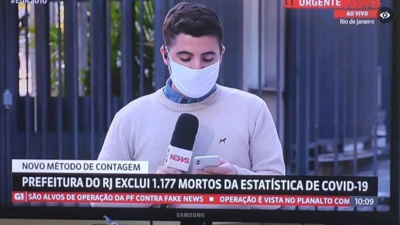

'--------------------------------------------------'

'Rank: 1 Val: 0.14405086636543274'

'102730_eng'

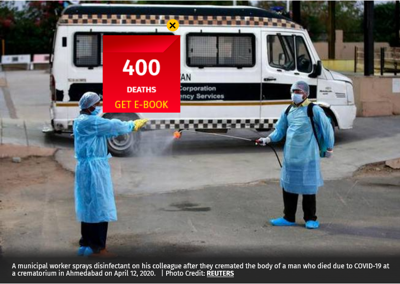

'--------------------------------------------------'

'Rank: 2 Val: 0.11350078880786896'

'102141_2_eng'

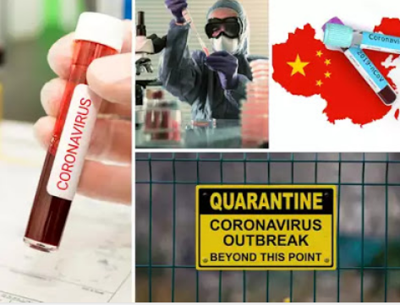

'--------------------------------------------------'

In [18]:
my_obj.show_results(
    search_query3[0],
)

## Improve the search results

For even better results, a slightly different approach has been prepared that can improve search results. It is quite resource-intensive, so it is applied after the main algorithm has found the most relevant images. This approach works only with text queries. Among the parameters you can choose 3 models: `"blip_base"`, `"blip_large"`, `"blip2_coco"`. If you get an `Out of Memory` error, try reducing the batch_size value (minimum = 1), which is the number of images being processed simultaneously. With the parameter `need_grad_cam = True/False` you can enable the calculation of the heat map of each image to be processed. Thus the `image_text_match_reordering` function calculates new similarity values and new ranks for each image. The resulting values are added to the general dictionary.

In [19]:
itm_model = "blip_base"
# itm_model = "blip_large"
# itm_model = "blip2_coco"

In [20]:
itm_scores, image_gradcam_with_itm = my_obj.image_text_match_reordering(
    search_query3,
    itm_model,
    image_keys,
    sorted_lists,
    batch_size=1,
    need_grad_cam=True,
)

  0%|          | 0.00/1.78G [00:00<?, ?B/s]

  0%|          | 4.01M/1.78G [00:00<01:24, 22.6MB/s]

  0%|          | 8.01M/1.78G [00:00<01:19, 24.0MB/s]

  1%|          | 13.9M/1.78G [00:00<00:52, 36.4MB/s]

  1%|          | 17.9M/1.78G [00:00<00:57, 32.9MB/s]

  1%|▏         | 24.0M/1.78G [00:00<00:55, 34.1MB/s]

  2%|▏         | 29.7M/1.78G [00:00<00:46, 40.5MB/s]

  2%|▏         | 33.9M/1.78G [00:01<01:13, 25.5MB/s]

  2%|▏         | 40.0M/1.78G [00:01<01:30, 20.6MB/s]

  2%|▏         | 45.3M/1.78G [00:01<01:12, 25.7MB/s]

  3%|▎         | 48.9M/1.78G [00:02<01:32, 20.0MB/s]

  3%|▎         | 56.0M/1.78G [00:02<01:38, 18.8MB/s]

  3%|▎         | 61.6M/1.78G [00:02<01:17, 23.8MB/s]

  4%|▎         | 65.0M/1.78G [00:02<01:25, 21.6MB/s]

  4%|▍         | 70.6M/1.78G [00:02<01:07, 27.3MB/s]

  4%|▍         | 74.3M/1.78G [00:03<01:09, 26.3MB/s]

  4%|▍         | 79.3M/1.78G [00:03<00:58, 31.2MB/s]

  5%|▍         | 83.2M/1.78G [00:03<00:54, 33.2MB/s]

  5%|▍         | 88.0M/1.78G [00:03<00:49, 36.5MB/s]

  5%|▌         | 93.3M/1.78G [00:03<00:44, 40.8MB/s]

  5%|▌         | 97.7M/1.78G [00:03<00:45, 39.7MB/s]

  6%|▌         | 104M/1.78G [00:03<00:57, 31.1MB/s] 

  6%|▌         | 110M/1.78G [00:04<00:48, 36.9MB/s]

  6%|▋         | 114M/1.78G [00:04<01:11, 24.9MB/s]

  7%|▋         | 120M/1.78G [00:04<00:59, 29.8MB/s]

  7%|▋         | 126M/1.78G [00:04<00:50, 35.0MB/s]

  7%|▋         | 130M/1.78G [00:04<01:03, 27.9MB/s]

  7%|▋         | 136M/1.78G [00:05<01:14, 23.7MB/s]

  8%|▊         | 142M/1.78G [00:05<00:58, 29.9MB/s]

  8%|▊         | 146M/1.78G [00:05<01:21, 21.4MB/s]

  8%|▊         | 152M/1.78G [00:06<01:45, 16.6MB/s]

  9%|▊         | 158M/1.78G [00:06<01:20, 21.5MB/s]

  9%|▉         | 161M/1.78G [00:06<01:23, 20.8MB/s]

  9%|▉         | 168M/1.78G [00:06<01:27, 19.9MB/s]

 10%|▉         | 174M/1.78G [00:06<01:08, 25.2MB/s]

 10%|▉         | 177M/1.78G [00:07<01:37, 17.7MB/s]

 10%|█         | 184M/1.78G [00:07<01:36, 17.7MB/s]

 10%|█         | 190M/1.78G [00:07<01:14, 22.8MB/s]

 11%|█         | 193M/1.78G [00:08<01:23, 20.4MB/s]

 11%|█         | 200M/1.78G [00:08<01:09, 24.6MB/s]

 11%|█▏        | 206M/1.78G [00:08<00:56, 29.8MB/s]

 12%|█▏        | 209M/1.78G [00:08<00:54, 30.8MB/s]

 12%|█▏        | 216M/1.78G [00:08<00:58, 28.8MB/s]

 12%|█▏        | 222M/1.78G [00:08<00:48, 34.8MB/s]

 12%|█▏        | 226M/1.78G [00:09<00:52, 31.8MB/s]

 13%|█▎        | 232M/1.78G [00:09<01:01, 27.0MB/s]

 13%|█▎        | 239M/1.78G [00:09<00:46, 35.4MB/s]

 13%|█▎        | 244M/1.78G [00:09<01:02, 26.3MB/s]

 14%|█▎        | 248M/1.78G [00:10<01:13, 22.5MB/s]

 14%|█▍        | 254M/1.78G [00:10<00:59, 27.8MB/s]

 14%|█▍        | 257M/1.78G [00:10<01:16, 21.3MB/s]

 15%|█▍        | 264M/1.78G [00:10<01:18, 20.9MB/s]

 15%|█▍        | 270M/1.78G [00:10<01:02, 26.1MB/s]

 15%|█▌        | 273M/1.78G [00:11<01:22, 19.8MB/s]

 15%|█▌        | 280M/1.78G [00:11<01:13, 22.0MB/s]

 16%|█▌        | 286M/1.78G [00:11<00:58, 27.7MB/s]

 16%|█▌        | 290M/1.78G [00:11<00:57, 27.9MB/s]

 16%|█▋        | 296M/1.78G [00:12<02:03, 13.0MB/s]

 17%|█▋        | 301M/1.78G [00:12<01:35, 16.6MB/s]

 17%|█▋        | 305M/1.78G [00:13<01:26, 18.3MB/s]

 17%|█▋        | 312M/1.78G [00:13<01:12, 21.9MB/s]

 18%|█▊        | 319M/1.78G [00:13<00:53, 29.4MB/s]

 18%|█▊        | 324M/1.78G [00:13<01:13, 21.5MB/s]

 18%|█▊        | 328M/1.78G [00:13<01:06, 23.6MB/s]

 18%|█▊        | 334M/1.78G [00:14<00:52, 29.6MB/s]

 19%|█▊        | 338M/1.78G [00:14<00:50, 30.5MB/s]

 19%|█▉        | 344M/1.78G [00:14<00:56, 27.6MB/s]

 19%|█▉        | 350M/1.78G [00:14<00:46, 33.1MB/s]

 19%|█▉        | 355M/1.78G [00:14<00:41, 37.0MB/s]

 20%|█▉        | 360M/1.78G [00:14<00:45, 33.4MB/s]

 20%|██        | 365M/1.78G [00:14<00:40, 37.9MB/s]

 20%|██        | 371M/1.78G [00:15<00:36, 42.2MB/s]

 21%|██        | 376M/1.78G [00:15<00:38, 39.2MB/s]

 21%|██        | 382M/1.78G [00:15<00:34, 43.8MB/s]

 21%|██        | 386M/1.78G [00:15<00:36, 40.8MB/s]

 22%|██▏       | 392M/1.78G [00:15<00:57, 26.3MB/s]

 22%|██▏       | 398M/1.78G [00:15<00:44, 33.2MB/s]

 22%|██▏       | 403M/1.78G [00:16<00:45, 32.9MB/s]

 22%|██▏       | 408M/1.78G [00:16<00:39, 37.3MB/s]

 23%|██▎       | 415M/1.78G [00:16<00:33, 44.3MB/s]

 23%|██▎       | 420M/1.78G [00:16<00:42, 34.3MB/s]

 23%|██▎       | 424M/1.78G [00:16<00:39, 36.7MB/s]

 24%|██▎       | 429M/1.78G [00:16<00:35, 40.9MB/s]

 24%|██▍       | 435M/1.78G [00:16<00:32, 45.4MB/s]

 24%|██▍       | 440M/1.78G [00:17<00:32, 44.5MB/s]

 25%|██▍       | 446M/1.78G [00:17<00:29, 49.5MB/s]

 25%|██▍       | 451M/1.78G [00:17<00:37, 38.0MB/s]

 25%|██▌       | 456M/1.78G [00:17<00:42, 34.1MB/s]

 25%|██▌       | 461M/1.78G [00:17<00:37, 38.5MB/s]

 26%|██▌       | 465M/1.78G [00:17<00:42, 33.2MB/s]

 26%|██▌       | 472M/1.78G [00:17<00:39, 36.2MB/s]

 26%|██▌       | 478M/1.78G [00:18<00:33, 41.4MB/s]

 27%|██▋       | 483M/1.78G [00:18<00:31, 43.9MB/s]

 27%|██▋       | 488M/1.78G [00:18<00:30, 46.4MB/s]

 27%|██▋       | 494M/1.78G [00:18<00:27, 50.2MB/s]

 27%|██▋       | 499M/1.78G [00:18<00:27, 50.4MB/s]

 28%|██▊       | 504M/1.78G [00:18<00:29, 47.1MB/s]

 28%|██▊       | 510M/1.78G [00:18<00:27, 50.4MB/s]

 28%|██▊       | 515M/1.78G [00:18<00:26, 50.8MB/s]

 29%|██▊       | 520M/1.78G [00:19<00:46, 29.3MB/s]

 29%|██▉       | 526M/1.78G [00:19<00:39, 34.4MB/s]

 29%|██▉       | 530M/1.78G [00:19<00:47, 28.8MB/s]

 29%|██▉       | 536M/1.78G [00:19<00:56, 24.0MB/s]

 30%|██▉       | 542M/1.78G [00:19<00:45, 29.6MB/s]

 30%|██▉       | 546M/1.78G [00:20<00:56, 23.9MB/s]

 30%|███       | 552M/1.78G [00:20<00:44, 29.6MB/s]

 31%|███       | 558M/1.78G [00:20<00:36, 36.2MB/s]

 31%|███       | 563M/1.78G [00:20<00:36, 36.0MB/s]

 31%|███       | 568M/1.78G [00:20<00:37, 35.4MB/s]

 31%|███▏      | 573M/1.78G [00:20<00:33, 39.5MB/s]

 32%|███▏      | 577M/1.78G [00:20<00:34, 38.2MB/s]

 32%|███▏      | 584M/1.78G [00:21<00:37, 34.5MB/s]

 32%|███▏      | 589M/1.78G [00:21<00:33, 38.9MB/s]

 33%|███▎      | 595M/1.78G [00:21<00:30, 42.8MB/s]

 33%|███▎      | 600M/1.78G [00:21<00:30, 42.0MB/s]

 33%|███▎      | 606M/1.78G [00:21<00:27, 46.2MB/s]

 34%|███▎      | 610M/1.78G [00:21<00:29, 42.7MB/s]

 34%|███▍      | 616M/1.78G [00:22<00:50, 24.9MB/s]

 34%|███▍      | 622M/1.78G [00:22<00:41, 30.5MB/s]

 34%|███▍      | 626M/1.78G [00:22<00:46, 27.1MB/s]

 35%|███▍      | 632M/1.78G [00:22<00:44, 28.0MB/s]

 35%|███▌      | 638M/1.78G [00:22<00:37, 33.1MB/s]

 35%|███▌      | 641M/1.78G [00:23<00:50, 24.4MB/s]

 36%|███▌      | 648M/1.78G [00:23<00:41, 29.7MB/s]

 36%|███▌      | 653M/1.78G [00:23<00:35, 34.5MB/s]

 36%|███▌      | 659M/1.78G [00:23<00:31, 39.0MB/s]

 36%|███▋      | 664M/1.78G [00:23<00:29, 40.7MB/s]

 37%|███▋      | 669M/1.78G [00:23<00:27, 44.4MB/s]

 37%|███▋      | 675M/1.78G [00:23<00:25, 47.1MB/s]

 37%|███▋      | 680M/1.78G [00:24<00:26, 45.2MB/s]

 38%|███▊      | 685M/1.78G [00:24<00:25, 46.9MB/s]

 38%|███▊      | 690M/1.78G [00:24<00:31, 37.5MB/s]

 38%|███▊      | 696M/1.78G [00:24<00:46, 25.1MB/s]

 39%|███▊      | 701M/1.78G [00:24<00:38, 30.2MB/s]

 39%|███▉      | 705M/1.78G [00:24<00:39, 29.9MB/s]

 39%|███▉      | 712M/1.78G [00:25<00:42, 27.2MB/s]

 39%|███▉      | 718M/1.78G [00:25<00:35, 32.5MB/s]

 40%|███▉      | 721M/1.78G [00:25<00:40, 28.7MB/s]

 40%|███▉      | 728M/1.78G [00:25<00:35, 32.6MB/s]

 40%|████      | 734M/1.78G [00:25<00:30, 37.7MB/s]

 41%|████      | 738M/1.78G [00:26<00:37, 29.9MB/s]

 41%|████      | 744M/1.78G [00:26<00:32, 35.2MB/s]

 41%|████      | 749M/1.78G [00:26<00:28, 39.7MB/s]

 41%|████▏     | 754M/1.78G [00:26<00:30, 36.8MB/s]

 42%|████▏     | 760M/1.78G [00:26<00:26, 42.4MB/s]

 42%|████▏     | 766M/1.78G [00:26<00:22, 48.1MB/s]

 42%|████▏     | 771M/1.78G [00:26<00:24, 44.1MB/s]

 43%|████▎     | 776M/1.78G [00:26<00:24, 45.3MB/s]

 43%|████▎     | 782M/1.78G [00:26<00:22, 48.6MB/s]

 43%|████▎     | 786M/1.78G [00:27<00:25, 42.8MB/s]

 44%|████▎     | 792M/1.78G [00:27<00:24, 43.2MB/s]

 44%|████▍     | 798M/1.78G [00:27<00:22, 46.8MB/s]

 44%|████▍     | 802M/1.78G [00:27<00:23, 46.0MB/s]

 44%|████▍     | 808M/1.78G [00:27<00:24, 42.7MB/s]

 45%|████▍     | 814M/1.78G [00:27<00:22, 46.9MB/s]

 45%|████▍     | 818M/1.78G [00:27<00:23, 43.9MB/s]

 45%|████▌     | 824M/1.78G [00:28<00:30, 34.7MB/s]

 46%|████▌     | 829M/1.78G [00:28<00:26, 38.8MB/s]

 46%|████▌     | 833M/1.78G [00:28<00:30, 34.0MB/s]

 46%|████▌     | 840M/1.78G [00:28<00:29, 34.6MB/s]

 46%|████▋     | 846M/1.78G [00:28<00:25, 39.9MB/s]

 47%|████▋     | 850M/1.78G [00:28<00:27, 36.3MB/s]

 47%|████▋     | 856M/1.78G [00:29<00:28, 36.0MB/s]

 47%|████▋     | 862M/1.78G [00:29<00:24, 40.8MB/s]

 48%|████▊     | 866M/1.78G [00:29<00:33, 30.1MB/s]

 48%|████▊     | 872M/1.78G [00:29<00:44, 22.2MB/s]

 48%|████▊     | 878M/1.78G [00:29<00:36, 27.3MB/s]

 48%|████▊     | 881M/1.78G [00:30<00:37, 26.5MB/s]

 49%|████▉     | 888M/1.78G [00:30<00:41, 23.5MB/s]

 49%|████▉     | 894M/1.78G [00:30<00:32, 29.5MB/s]

 49%|████▉     | 898M/1.78G [00:30<00:37, 26.0MB/s]

 50%|████▉     | 904M/1.78G [00:30<00:32, 29.8MB/s]

 50%|█████     | 912M/1.78G [00:31<00:24, 39.3MB/s]

 50%|█████     | 917M/1.78G [00:31<00:31, 30.0MB/s]

 51%|█████     | 920M/1.78G [00:31<00:40, 23.5MB/s]

 51%|█████     | 928M/1.78G [00:31<00:37, 25.1MB/s]

 51%|█████▏    | 933M/1.78G [00:32<00:31, 29.6MB/s]

 51%|█████▏    | 937M/1.78G [00:32<00:31, 29.4MB/s]

 52%|█████▏    | 944M/1.78G [00:32<00:29, 31.7MB/s]

 52%|█████▏    | 951M/1.78G [00:32<00:23, 38.5MB/s]

 52%|█████▏    | 955M/1.78G [00:32<00:34, 26.1MB/s]

 53%|█████▎    | 960M/1.78G [00:32<00:30, 29.6MB/s]

 53%|█████▎    | 966M/1.78G [00:33<00:25, 35.2MB/s]

 53%|█████▎    | 970M/1.78G [00:33<00:25, 35.6MB/s]

 54%|█████▎    | 976M/1.78G [00:33<00:22, 39.8MB/s]

 54%|█████▍    | 982M/1.78G [00:33<00:19, 45.6MB/s]

 54%|█████▍    | 987M/1.78G [00:33<00:19, 43.9MB/s]

 54%|█████▍    | 992M/1.78G [00:33<00:21, 40.4MB/s]

 55%|█████▍    | 998M/1.78G [00:33<00:19, 44.7MB/s]

 55%|█████▌    | 0.98G/1.78G [00:34<00:27, 31.2MB/s]

 55%|█████▌    | 0.98G/1.78G [00:34<00:22, 37.4MB/s]

 56%|█████▌    | 0.99G/1.78G [00:34<00:19, 42.3MB/s]

 56%|█████▌    | 0.99G/1.78G [00:34<00:21, 39.2MB/s]

 56%|█████▋    | 1.00G/1.78G [00:34<00:20, 41.1MB/s]

 57%|█████▋    | 1.01G/1.78G [00:34<00:17, 46.8MB/s]

 57%|█████▋    | 1.01G/1.78G [00:35<00:32, 25.3MB/s]

 57%|█████▋    | 1.02G/1.78G [00:35<00:40, 20.4MB/s]

 57%|█████▋    | 1.02G/1.78G [00:35<00:31, 25.6MB/s]

 58%|█████▊    | 1.02G/1.78G [00:35<00:36, 22.2MB/s]

 58%|█████▊    | 1.03G/1.78G [00:36<00:48, 16.6MB/s]

 58%|█████▊    | 1.04G/1.78G [00:36<00:36, 21.7MB/s]

 59%|█████▊    | 1.04G/1.78G [00:36<00:36, 21.6MB/s]

 59%|█████▉    | 1.05G/1.78G [00:36<00:30, 25.8MB/s]

 59%|█████▉    | 1.05G/1.78G [00:36<00:25, 31.0MB/s]

 59%|█████▉    | 1.06G/1.78G [00:37<00:33, 23.4MB/s]

 60%|█████▉    | 1.06G/1.78G [00:37<00:34, 22.4MB/s]

 60%|██████    | 1.07G/1.78G [00:37<00:27, 27.3MB/s]

 60%|██████    | 1.07G/1.78G [00:37<00:26, 28.1MB/s]

 61%|██████    | 1.08G/1.78G [00:37<00:22, 33.6MB/s]

 61%|██████    | 1.08G/1.78G [00:38<00:18, 39.6MB/s]

 61%|██████    | 1.09G/1.78G [00:38<00:18, 40.0MB/s]

 62%|██████▏   | 1.09G/1.78G [00:38<00:18, 39.0MB/s]

 62%|██████▏   | 1.10G/1.78G [00:38<00:15, 45.9MB/s]

 62%|██████▏   | 1.10G/1.78G [00:38<00:16, 44.9MB/s]

 63%|██████▎   | 1.11G/1.78G [00:38<00:13, 53.7MB/s]

 63%|██████▎   | 1.12G/1.78G [00:38<00:11, 59.4MB/s]

 63%|██████▎   | 1.13G/1.78G [00:38<00:13, 53.3MB/s]

 64%|██████▎   | 1.13G/1.78G [00:38<00:11, 58.4MB/s]

 64%|██████▍   | 1.14G/1.78G [00:39<00:11, 60.4MB/s]

 64%|██████▍   | 1.14G/1.78G [00:39<00:11, 61.7MB/s]

 65%|██████▍   | 1.15G/1.78G [00:39<00:10, 65.1MB/s]

 65%|██████▌   | 1.16G/1.78G [00:39<00:09, 68.1MB/s]

 66%|██████▌   | 1.16G/1.78G [00:39<00:13, 50.4MB/s]

 66%|██████▌   | 1.17G/1.78G [00:39<00:13, 49.8MB/s]

 66%|██████▋   | 1.18G/1.78G [00:39<00:12, 53.2MB/s]

 67%|██████▋   | 1.18G/1.78G [00:40<00:14, 44.0MB/s]

 67%|██████▋   | 1.19G/1.78G [00:40<00:15, 40.4MB/s]

 67%|██████▋   | 1.20G/1.78G [00:40<00:15, 40.7MB/s]

 68%|██████▊   | 1.20G/1.78G [00:40<00:13, 45.1MB/s]

 68%|██████▊   | 1.21G/1.78G [00:40<00:21, 28.9MB/s]

 68%|██████▊   | 1.21G/1.78G [00:41<00:23, 26.1MB/s]

 68%|██████▊   | 1.22G/1.78G [00:41<00:19, 31.3MB/s]

 69%|██████▊   | 1.22G/1.78G [00:41<00:17, 34.9MB/s]

 69%|██████▉   | 1.23G/1.78G [00:41<00:25, 23.1MB/s]

 69%|██████▉   | 1.23G/1.78G [00:41<00:19, 30.3MB/s]

 70%|██████▉   | 1.24G/1.78G [00:42<00:18, 30.7MB/s]

 70%|██████▉   | 1.24G/1.78G [00:42<00:27, 21.1MB/s]

 70%|███████   | 1.25G/1.78G [00:42<00:21, 26.1MB/s]

 70%|███████   | 1.25G/1.78G [00:42<00:20, 27.2MB/s]

 71%|███████   | 1.26G/1.78G [00:42<00:16, 33.1MB/s]

 71%|███████   | 1.26G/1.78G [00:42<00:13, 40.0MB/s]

 71%|███████▏  | 1.27G/1.78G [00:43<00:13, 41.3MB/s]

 72%|███████▏  | 1.27G/1.78G [00:43<00:12, 42.7MB/s]

 72%|███████▏  | 1.28G/1.78G [00:43<00:11, 46.5MB/s]

 72%|███████▏  | 1.28G/1.78G [00:43<00:15, 33.2MB/s]

 73%|███████▎  | 1.29G/1.78G [00:43<00:14, 35.1MB/s]

 73%|███████▎  | 1.29G/1.78G [00:43<00:12, 40.3MB/s]

 73%|███████▎  | 1.30G/1.78G [00:43<00:12, 40.0MB/s]

 73%|███████▎  | 1.30G/1.78G [00:44<00:12, 41.4MB/s]

 74%|███████▎  | 1.31G/1.78G [00:44<00:10, 46.2MB/s]

 74%|███████▍  | 1.32G/1.78G [00:44<00:10, 46.7MB/s]

 74%|███████▍  | 1.32G/1.78G [00:44<00:10, 45.1MB/s]

 75%|███████▍  | 1.33G/1.78G [00:44<00:09, 50.2MB/s]

 75%|███████▍  | 1.33G/1.78G [00:44<00:10, 46.0MB/s]

 75%|███████▌  | 1.34G/1.78G [00:44<00:10, 44.8MB/s]

 76%|███████▌  | 1.34G/1.78G [00:44<00:08, 52.2MB/s]

 76%|███████▌  | 1.35G/1.78G [00:44<00:09, 49.2MB/s]

 76%|███████▌  | 1.35G/1.78G [00:45<00:10, 43.2MB/s]

 76%|███████▋  | 1.36G/1.78G [00:45<00:10, 44.7MB/s]

 77%|███████▋  | 1.37G/1.78G [00:45<00:08, 50.3MB/s]

 77%|███████▋  | 1.37G/1.78G [00:45<00:09, 48.4MB/s]

 77%|███████▋  | 1.38G/1.78G [00:45<00:09, 47.7MB/s]

 78%|███████▊  | 1.38G/1.78G [00:45<00:09, 45.5MB/s]

 78%|███████▊  | 1.39G/1.78G [00:45<00:08, 50.4MB/s]

 78%|███████▊  | 1.39G/1.78G [00:46<00:08, 46.0MB/s]

 79%|███████▊  | 1.40G/1.78G [00:46<00:09, 42.4MB/s]

 79%|███████▉  | 1.40G/1.78G [00:46<00:08, 46.6MB/s]

 79%|███████▉  | 1.41G/1.78G [00:46<00:08, 44.2MB/s]

 80%|███████▉  | 1.41G/1.78G [00:46<00:08, 44.4MB/s]

 80%|███████▉  | 1.42G/1.78G [00:46<00:07, 49.6MB/s]

 80%|████████  | 1.42G/1.78G [00:46<00:09, 40.3MB/s]

 80%|████████  | 1.43G/1.78G [00:46<00:08, 43.0MB/s]

 81%|████████  | 1.44G/1.78G [00:47<00:07, 50.3MB/s]

 81%|████████  | 1.44G/1.78G [00:47<00:07, 48.5MB/s]

 81%|████████▏ | 1.45G/1.78G [00:47<00:07, 46.2MB/s]

 82%|████████▏ | 1.45G/1.78G [00:47<00:07, 46.9MB/s]

 82%|████████▏ | 1.46G/1.78G [00:47<00:06, 50.5MB/s]

 82%|████████▏ | 1.46G/1.78G [00:47<00:08, 41.0MB/s]

 83%|████████▎ | 1.47G/1.78G [00:47<00:07, 41.6MB/s]

 83%|████████▎ | 1.47G/1.78G [00:47<00:06, 46.7MB/s]

 83%|████████▎ | 1.48G/1.78G [00:48<00:06, 47.8MB/s]

 84%|████████▎ | 1.48G/1.78G [00:48<00:07, 42.7MB/s]

 84%|████████▍ | 1.49G/1.78G [00:48<00:06, 47.2MB/s]

 84%|████████▍ | 1.49G/1.78G [00:48<00:08, 35.9MB/s]

 84%|████████▍ | 1.50G/1.78G [00:48<00:08, 34.2MB/s]

 85%|████████▍ | 1.51G/1.78G [00:48<00:06, 43.2MB/s]

 85%|████████▌ | 1.51G/1.78G [00:49<00:08, 35.6MB/s]

 85%|████████▌ | 1.52G/1.78G [00:49<00:08, 34.2MB/s]

 86%|████████▌ | 1.52G/1.78G [00:49<00:06, 43.7MB/s]

 86%|████████▌ | 1.53G/1.78G [00:49<00:06, 39.2MB/s]

 86%|████████▌ | 1.53G/1.78G [00:49<00:07, 34.8MB/s]

 87%|████████▋ | 1.54G/1.78G [00:49<00:09, 26.3MB/s]

 87%|████████▋ | 1.55G/1.78G [00:50<00:09, 25.6MB/s]

 87%|████████▋ | 1.55G/1.78G [00:50<00:07, 30.4MB/s]

 88%|████████▊ | 1.56G/1.78G [00:50<00:07, 30.4MB/s]

 88%|████████▊ | 1.56G/1.78G [00:50<00:09, 23.9MB/s]

 88%|████████▊ | 1.57G/1.78G [00:51<00:07, 29.0MB/s]

 88%|████████▊ | 1.57G/1.78G [00:51<00:08, 25.3MB/s]

 89%|████████▉ | 1.58G/1.78G [00:51<00:07, 30.0MB/s]

 89%|████████▉ | 1.58G/1.78G [00:51<00:05, 35.4MB/s]

 89%|████████▉ | 1.59G/1.78G [00:51<00:05, 34.9MB/s]

 90%|████████▉ | 1.59G/1.78G [00:51<00:05, 37.8MB/s]

 90%|████████▉ | 1.60G/1.78G [00:51<00:04, 43.8MB/s]

 90%|█████████ | 1.60G/1.78G [00:52<00:04, 40.9MB/s]

 91%|█████████ | 1.61G/1.78G [00:52<00:04, 39.6MB/s]

 91%|█████████ | 1.62G/1.78G [00:52<00:03, 45.7MB/s]

 91%|█████████ | 1.62G/1.78G [00:52<00:03, 43.6MB/s]

 91%|█████████▏| 1.63G/1.78G [00:52<00:03, 43.7MB/s]

 92%|█████████▏| 1.63G/1.78G [00:52<00:03, 47.7MB/s]

 92%|█████████▏| 1.64G/1.78G [00:52<00:03, 39.0MB/s]

 92%|█████████▏| 1.64G/1.78G [00:53<00:03, 36.9MB/s]

 93%|█████████▎| 1.65G/1.78G [00:53<00:03, 42.6MB/s]

 93%|█████████▎| 1.65G/1.78G [00:53<00:08, 16.9MB/s]

 93%|█████████▎| 1.66G/1.78G [00:54<00:06, 20.8MB/s]

 94%|█████████▎| 1.66G/1.78G [00:54<00:04, 26.8MB/s]

 94%|█████████▎| 1.67G/1.78G [00:54<00:05, 23.3MB/s]

 94%|█████████▍| 1.67G/1.78G [00:54<00:04, 25.3MB/s]

 94%|█████████▍| 1.68G/1.78G [00:54<00:03, 32.9MB/s]

 95%|█████████▍| 1.68G/1.78G [00:54<00:04, 25.3MB/s]

 95%|█████████▍| 1.69G/1.78G [00:55<00:04, 20.0MB/s]

 95%|█████████▌| 1.69G/1.78G [00:55<00:03, 26.6MB/s]

 95%|█████████▌| 1.70G/1.78G [00:55<00:04, 21.2MB/s]

 96%|█████████▌| 1.70G/1.78G [00:55<00:03, 24.0MB/s]

 96%|█████████▌| 1.71G/1.78G [00:56<00:02, 29.3MB/s]

 96%|█████████▋| 1.71G/1.78G [00:56<00:02, 27.3MB/s]

 97%|█████████▋| 1.72G/1.78G [00:56<00:03, 20.7MB/s]

 97%|█████████▋| 1.72G/1.78G [00:56<00:02, 25.9MB/s]

 97%|█████████▋| 1.73G/1.78G [00:57<00:02, 21.9MB/s]

 98%|█████████▊| 1.73G/1.78G [00:57<00:02, 22.1MB/s]

 98%|█████████▊| 1.74G/1.78G [00:57<00:01, 27.4MB/s]

 98%|█████████▊| 1.74G/1.78G [00:57<00:01, 28.8MB/s]

 98%|█████████▊| 1.75G/1.78G [00:57<00:01, 29.0MB/s]

 99%|█████████▊| 1.76G/1.78G [00:57<00:00, 34.0MB/s]

 99%|█████████▉| 1.76G/1.78G [00:58<00:00, 34.5MB/s]

 99%|█████████▉| 1.77G/1.78G [00:58<00:00, 32.2MB/s]

100%|█████████▉| 1.77G/1.78G [00:58<00:00, 35.8MB/s]

100%|██████████| 1.78G/1.78G [00:58<00:00, 32.6MB/s]

Then using the same output function you can add the `ITM=True` arguments to output the new image order. You can also add the `image_gradcam_with_itm` argument to output the heat maps of the calculated images. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

'Rank: 0 Val: 0.05829600617289543'

'106349S_por'

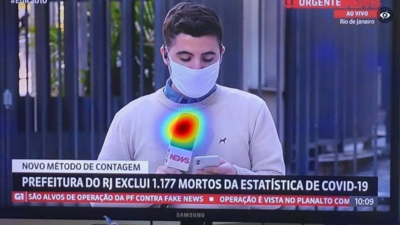

'--------------------------------------------------'

'Rank: 1 Val: 0.0018555367132648826'

'102730_eng'

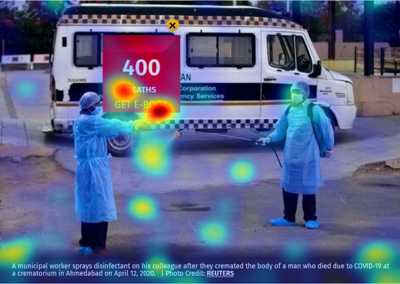

'--------------------------------------------------'

'Rank: 2 Val: 0.0012622319627553225'

'102141_2_eng'

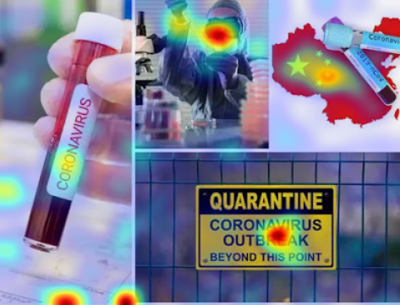

'--------------------------------------------------'

In [21]:
my_obj.show_results(
    search_query3[0], itm=True, image_gradcam_with_itm=image_gradcam_with_itm
)

## Save search results to csv

Convert the dictionary of dictionarys into a dictionary with lists:

In [22]:
df = mutils.get_dataframe(mydict)

Check the dataframe:

In [23]:
df.head(10)

filename  rank politician press conference  \
0    data/102730_eng.png                                 1   
1  data/102141_2_eng.png                                 2   
2   data/106349S_por.png                                 0   

   politician press conference  rank a world map  a world map  rank a dog  \
0                     0.144051                 0     0.131088           1   
1                     0.113501                 1     0.106334           2   
2                     0.166554                 2     0.093529           0   

      a dog  itm politician press conference  \
0  0.100833                         0.001856   
1  0.049040                         0.001262   
2  0.108629                         0.058296   

   itm_rank politician press conference  itm a world map  \
0                                     1         0.004548   
1                                     2         0.085763   
2                                     0         0.000794   

   itm_rank a world map  itm a dog  itm_rank a dog  
0                     1   0.000812               0  
1                     0   0.000175               1  
2                     2   0.000091               2

Write the csv file:

In [24]:
df.to_csv("data/data_out.csv")